# MS_MOVIES_ANALSYS

**Authors:** Jaswinder singh
***

## Overview


THE file contains the crystal view of data from the resouurce IMBD in terms of business, statics, data, methods and recomendations

## Business Problem

Microsoft, the tech company is now jumping into the entertainment industry.
thus, before making a high budget feature film, it is a good practice to analyse data from past and then make right decision.

***

**the company wants to make a movie as a symbol of creating MICROSOFT STUDIOS, thys, the type of fims is really important to stand in the crowd.
**the data used in this project is completely from IMDB, the datasets are the records of popular movies with respect to following aspects: region, director, writer, ratings, votes, language etc. though,, some records are not useful.
**this project analuse the data and create graphs to show information such as: most rated movies, most popular writer, director, highest number of movies by year and so on.
**this information will help the stakeholders to make a right decision about choosing genre of the movie, director for movie, region to release in.
***

## Data Understanding


Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* Data in this project belongs to IMDB. Dataframes contains information such as release year, writer, director, revenue of the movies.
* What is the target variable?
* Target variables are "popular writer", "popular director", "average ratings". "votes" etc.
* What are the properties of the variables you intend to use?
* The variables are complete strings and integers. It is a good practice to format data with respect to each other in order to make and understand a trend.
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import gzip
import csv

In [42]:
# import files which contains data about rating, titles etc.
df_r=pd.read_csv('imdb.title.ratings.csv.gz')
df_c=pd.read_csv('imdb.title.crew.csv.gz')
df_a=pd.read_csv('imdb.title.akas.csv.gz')
df_b=pd.read_csv('imdb.name.basics.csv.gz')

In [4]:
#checking info and a overview of the datasets
df_r.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [5]:
df_c.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [6]:
df_a.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [7]:
# changing columns name from title id to tconst
new_df=df_a.rename(columns={'title_id':'tconst'})

In [8]:
#all three data sets have one common attribute whihc is title. 

In [9]:
#merging all datasets in to one dataset
dfm1=df_r.merge(df_c)
dfm=dfm1.merge(new_df)

In [10]:
dfm

,tconst,averagerating,numvotes,directors,writers,ordering,title,region,language,types,attributes,is_original_title
0,tt1042974,6.4,20,nm1915232,nm1915232,1,Just Inès,NaN,NaN,original,NaN,1.0
1,tt1042974,6.4,20,nm1915232,nm1915232,2,Samo Ines,RS,NaN,imdbDisplay,NaN,0.0
2,tt1042974,6.4,20,nm1915232,nm1915232,3,Just Inès,GB,NaN,NaN,NaN,0.0
3,tt1043726,4.2,50352,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866",10,The Legend of Hercules,NaN,NaN,original,NaN,1.0
4,tt1043726,4.2,50352,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866",11,Hércules - A Lenda Começa,PT,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9691896,6.3,21,nm0663605,NaN,4,Coming Out,NaN,NaN,original,NaN,1.0
261802,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",1,Code Geass: Lelouch of the Rebellion Episode III,JP,NaN,NaN,NaN,0.0
261803,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",2,Code Geass: Lelouch of the Rebellion Episode III,NaN,NaN,original,NaN,1.0
261804,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,NaN,0.0


In [11]:
#checking for duplicate entries
dfm.duplicated().value_counts()

False    261806
dtype: int64

In [12]:
# filetring movies having average rating more than 7
df_average=dfm.loc[(dfm['averagerating']>7)]
df_average

,tconst,averagerating,numvotes,directors,writers,ordering,title,region,language,types,attributes,is_original_title
55,tt1156528,7.2,265,nm0121203,nm0121203,1,Silent Sonata,XWW,en,imdbDisplay,NaN,0.0
56,tt1156528,7.2,265,nm0121203,nm0121203,2,Circus Fantasticus,SI,NaN,NaN,NaN,0.0
57,tt1156528,7.2,265,nm0121203,nm0121203,3,Sonata silenciosa,UY,NaN,NaN,original subtitled version,0.0
58,tt1156528,7.2,265,nm0121203,nm0121203,4,Circus Fantasticus,FI,NaN,imdbDisplay,NaN,0.0
59,tt1156528,7.2,265,nm0121203,nm0121203,5,I sonata tis siopis,GR,NaN,festival,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
261777,tt9526152,7.6,29,nm1425958,nm8916539,6,Gekijouban danjon ni deai o motomeru no wa mac...,JP,NaN,NaN,NaN,0.0
261802,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",1,Code Geass: Lelouch of the Rebellion Episode III,JP,NaN,NaN,NaN,0.0
261803,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",2,Code Geass: Lelouch of the Rebellion Episode III,NaN,NaN,original,NaN,1.0
261804,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,NaN,0.0


In [13]:
# now, we will take the title id of directors and writers having most number of movies
# most frequent value in Team
df_average['writers'].value_counts().idxmax()

'nm0604555,nm0860155'

In [14]:
# most frequent value in Team
df_average['directors'].value_counts().idxmax()

'nm0000229'

In [15]:
#dropping column which are not important
final=df_average.drop(['is_original_title'],axis=1)

In [16]:
final

,tconst,averagerating,numvotes,directors,writers,ordering,title,region,language,types,attributes
55,tt1156528,7.2,265,nm0121203,nm0121203,1,Silent Sonata,XWW,en,imdbDisplay,NaN
56,tt1156528,7.2,265,nm0121203,nm0121203,2,Circus Fantasticus,SI,NaN,NaN,NaN
57,tt1156528,7.2,265,nm0121203,nm0121203,3,Sonata silenciosa,UY,NaN,NaN,original subtitled version
58,tt1156528,7.2,265,nm0121203,nm0121203,4,Circus Fantasticus,FI,NaN,imdbDisplay,NaN
59,tt1156528,7.2,265,nm0121203,nm0121203,5,I sonata tis siopis,GR,NaN,festival,NaN
...,...,...,...,...,...,...,...,...,...,...,...
261777,tt9526152,7.6,29,nm1425958,nm8916539,6,Gekijouban danjon ni deai o motomeru no wa mac...,JP,NaN,NaN,NaN
261802,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",1,Code Geass: Lelouch of the Rebellion Episode III,JP,NaN,NaN,NaN
261803,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",2,Code Geass: Lelouch of the Rebellion Episode III,NaN,NaN,original,NaN
261804,tt9844256,7.5,24,nm0849465,"nm0849465,nm1287521",3,Code Geass: Lelouch of the Rebellion - Glorifi...,XWW,en,imdbDisplay,NaN


In [128]:
# #now, we will filter the movies which has these writers or directors as crew
crew=final[(final["directors"] == 'nm0000229') | (final["writers"] == "nm0604555,nm0860155")]
crew.head(2)

,tconst,averagerating,numvotes,directors,writers,ordering,title,region,language,types,attributes
4384,tt0443272,7.4,228701,nm0000229,"nm1065785,nm0329447",10,Lincoln,HR,NaN,imdbDisplay,NaN
4385,tt0443272,7.4,228701,nm0000229,"nm1065785,nm0329447",11,Lincoln,GR,NaN,imdbDisplay,NaN


<AxesSubplot:xlabel='averagerating', ylabel='ordering'>

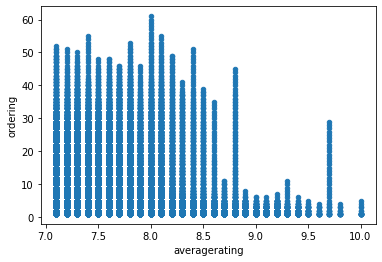

In [130]:
final.plot(x ='averagerating', y='ordering', kind = 'scatter')


In [19]:
# here we can see that the most orderd movies are the ones whihc are rated arround 8 and 8.5.
# this gives insights that extreme rated movies are not much popular.


In [140]:
# so, no we will check the title of the movies having rating arround 8 and 8.5
final.loc[final['directors'] =='nm0000229', ['title']]

,title
4384,Lincoln
4385,Lincoln
4386,Lincoln
4387,Lincoln
4388,Лiнкольн
...,...
253805,War Horse
253806,Caballo de guerra
253807,Caballo de batalla
253808,Gefährten


In [141]:
## from above data and internet, it is concluded that Steven Spielberg is a good choice for writer

In [ ]:
# now, we will check this data set from kaggle

In [56]:
df_k=pd.read_csv('archive.zip')

In [57]:
# to check the view to dataset
df_k.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [59]:
df_k.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [64]:
#check the columns and create a varribale to for movies over 180mis of runtime
df_k.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [65]:
df_k[df_k['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [84]:
#checking votes for movies with respect to year
df_k.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

Text(0, 0.5, 'years')

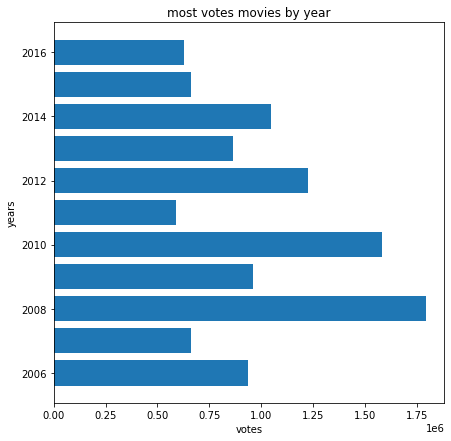

In [96]:
a=df_k['Year']
b=df_k['Votes']
 
# creating the bar plot
fig, ax = plt.subplots(figsize =(7, 7))
ax.barh(a,b)
ax.set_title('most votes movies by year')
ax.set_xlabel('votes')
ax.set_ylabel('years')

In [186]:
#finding movies which are top rated and checking the name of directors
h_r=df_k.nlargest(10,'Rating')[['Title','Rating','Director','Metascore','Runtime (Minutes)']]\
.set_index('Title')
h_r

,Rating,Director,Metascore,Runtime (Minutes)
Title,,,,
The Dark Knight,9.0,Christopher Nolan,82.0,152
Inception,8.8,Christopher Nolan,74.0,148
Dangal,8.8,Nitesh Tiwari,NaN,161
Interstellar,8.6,Christopher Nolan,74.0,169
Kimi no na wa,8.6,Makoto Shinkai,79.0,106
The Intouchables,8.6,Olivier Nakache,57.0,112
The Prestige,8.5,Christopher Nolan,66.0,130
The Departed,8.5,Martin Scorsese,85.0,151
The Dark Knight Rises,8.5,Christopher Nolan,78.0,164


<AxesSubplot:xlabel='Rating', ylabel='Title'>

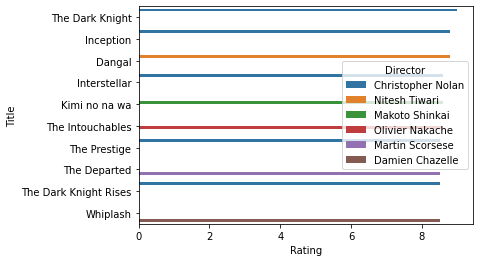

In [187]:
#visualize the result for better understanding
#importing seaborn library for better graphs
import seaborn as sns

# creating the bar plot
sns.barplot(x='Rating',y=h_r.index,data=h_r,hue='Director')
#the documentation for seaborn library is at https://seaborn.pydata.org/

In [ ]:
#we can see that the movies by christopher nolan are frequently top rated

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

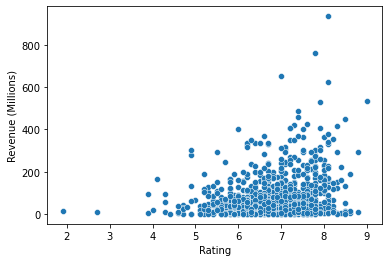

In [147]:
#now, we will check the relation between ratings and revenue. as revenue is considered the most important aspect of a movie.
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df_k)

In [ ]:
# it is concluded that rating affects revenue. 

In [152]:
# let's predict the genre of the movie
g=df_k['Genre'].value_counts().idxmax()
g

'Action,Adventure,Sci-Fi'

In [ ]:
#it is clear that genre of the movie shoud be action revolving arround a storyline based on science fiction.

In [178]:
df_k[df_k.Genre.str.contains('Action,Adventure,Sci-Fi')].shape

(50, 12)

In [ ]:
#50 movies are made under the category of action, scie-fi, adventure.

<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Metascore'>

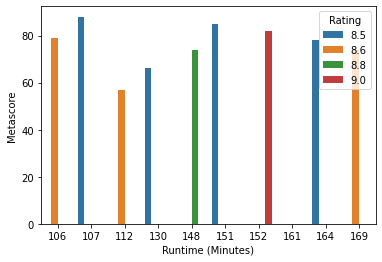

In [190]:
sns.barplot(x='Runtime (Minutes)',y='Metascore',data=h_r,hue='Rating')

In [ ]:
 #metascore is effectively high if the movie runtime is about 110 minutes, also rating is high for the same.

## Data Preparation



***
Questions to consider:
* Were there variables you dropped or created?
* yes, dropped column named'originot title'
* How did you address missing values or outliers?
* analyzed the data, there were no outliers and missing data
* Why are these choices appropriate given the data and the business problem?
* Thses choices provides the data in seriess of mast occurence and camparisons to predict the attributes for the movie.

## Data Modeling

***
Questions to consider:
* How did you analyze or model the data?
* we previewed the datasets and cheked the values of mean, median mode, columns,shapes etc. then we sorted and merged the datasets to create a model and performed functions on that.
* we also used one more data set from kaggle to do some extra work.
* Why are these choices appropriate given the data and the business problem?
* as all the data sets are about movies, so, there were some attributes common in each set, like title, votes etc. merging the datasets allowed to seea bigger picture, which then helped to predict the trend.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* results shos the comparisons, frequent occurence of strings in top rated movies with high revenue. this will help to understand the algorithm of a successfull movie.
* How well does your model fit your data? How much better is this than your baseline model?
* the model have all the colmns set and clean. there is no coumn whihc is not useful and the dataset contains the values of all initial sets.
* How confident are you that your results would generalize beyond the data you have?
* I can take the risk to produce this movie, and still sleep well.
* How confident are you that this model would benefit the business if put into use?
* Microsoft will be bigger than MARVEL STUDIOS.
***

## Conclusions

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* Microsoft should make a movie which revolves arround technology and science fiction, with the storyline of adventure and action mixed.
* What are some reasons why your analysis might not fully solve the business problem?
* entertainment industry is been always a chanllenge. audience is unpredictable. Eventhough, the pridictions are done in perfact way, there is still 0.00001 percent chance to face failure.
* What else could you do in the future to improve this project?
* as these datasets have information much old, I woould use a realtime dataset.
***